In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:/Users/hp/Documents/CarPrice_Assignment.csv")


In [10]:
# Check for missing values
missing_values = df.isna().sum()



In [15]:
# Actual column names in your dataset
actual_column_names = ['make', 'fuel-type', 'body-style', 'num-of-doors', 'num-of-cylinders' ]

# Update the categorical_cols list to match the actual column names
categorical_cols = ['make', 'fuel-type', 'body-style', 'num-of-doors', 'num-of-cylinders']


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


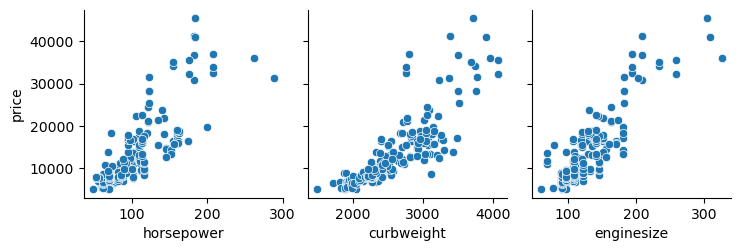

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# EDA example: Pairplot
sns.pairplot(df, x_vars=['horsepower', 'curbweight', 'enginesize'], y_vars=['price'])
plt.show()


In [17]:
print(df.columns)


Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [24]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='price')
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


In [33]:
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
print(non_numeric_columns)


Index(['CarName', 'doornumber', 'fueltype_gas', 'aspiration_turbo',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')


In [ ]:
from sklearn.linear_model import Lasso, Ridge

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
ab_model = AdaBoostRegressor(n_estimators=100, random_state=42)
ab_model.fit(X_train, y_train)


In [36]:
# Use the same features used in X_train and X_test for the test dataset
test_df = df.drop(columns='price')


In [ ]:
test_predictions = model.predict(test_df)